### Import Packages

In [1]:
import os
import re
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from lib import renders as rs
from lib.cluster import kmeans, find_best_cluster, feature_importance, plot_kmeans_cluster

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Import Data

In [2]:
file_loc = "/Users/alexcheng/Desktop/stats_14-17_100.csv"

In [3]:
data = pd.read_csv(file_loc)
data.head()

,Unnamed: 0,Status,Player,Pos,Player_ID,url,G,MP,PER,TS%,...,DRB_100,TRB_100,AST_100,STL_100,BLK_100,TOV_100,PF_100,PTS_100,ORtg,DRtg
0,0,Inactive,A.J. Price,PG,priceaj01,file:///Users/alexcheng/Downloads/us.sitesucke...,261,3929,12.2,0.486,...,4.0,4.9,7.4,1.6,0.1,3.0,3.1,19.8,100,108
1,1,Active,Aaron Brooks,PG,brookaa01,file:///Users/alexcheng/Downloads/us.sitesucke...,594,13016,13.5,0.525,...,3.2,4.1,7.4,1.4,0.3,3.8,4.6,24.0,104,110
2,2,Active,Aaron Gordon,SF,gordoaa01,file:///Users/alexcheng/Downloads/us.sitesucke...,182,4238,14.3,0.522,...,7.9,11.2,3.2,1.4,1.2,2.0,4.2,18.9,107,108
3,3,Active,Aaron Harrison,SG,harriaa01,file:///Users/alexcheng/Downloads/us.sitesucke...,26,110,3.3,0.326,...,6.4,8.2,2.3,2.7,0.0,1.8,5.5,8.7,73,104
4,4,Active,Adreian Payne,PF,paynead01,file:///Users/alexcheng/Downloads/us.sitesucke...,96,1317,7.4,0.444,...,8.4,11.3,2.4,1.5,0.9,3.3,7.2,15.1,87,110


In [4]:
data.columns

Index([u'Unnamed: 0', u'Status', u'Player', u'Pos', u'Player_ID', u'url', u'G',
       u'MP', u'PER', u'TS%', u'3PAr', u'FTr', u'ORB%', u'DRB%', u'TRB%',
       u'AST%', u'STL%', u'BLK%', u'TOV%', u'USG%', u'OBPM', u'DPM', u'BPM',
       u'FG%', u'AVG_DIST_FGA', u'%FGA_2P', u'%FGA_0-3ft', u'%FGA_3-10ft',
       u'%FGA_10-16ft', u'%FGA_16ft<3', u'%FGA_3P', u'2P%', u'0-3_FG%',
       u'3-10_FG%', u'10-16_FG%', u'16<3_FG%', u'3P%', u'%ASTd_2P',
       u'%FGA_DUNK', u'%ASTd_3P', u'%_CORNER3PA', u'3P%_CORNER3', u'FG_100',
       u'FGA_100', u'FG%_100', u'3P_100', u'3PA_100', u'3P%_100', u'2P_100',
       u'2PA_100', u'2P%_100', u'FT_100', u'FTA_100', u'FT%_100', u'ORB_100',
       u'DRB_100', u'TRB_100', u'AST_100', u'STL_100', u'BLK_100', u'TOV_100',
       u'PF_100', u'PTS_100', u'ORtg', u'DRtg'],
      dtype='object')

### Data Cleaning

In [5]:
# Drop unwanted columns
data = data.drop(['Unnamed: 0', 'MP', '3PAr'], axis=1)

In [8]:
# Filter out players who have played less than 20 games
data = data[data['G']>40]

In [9]:
data.shape

(547, 62)

### Data Preprocessing

In [10]:
X = data.drop(['Player', 'Pos', 'G', 'Player_ID','url', 'Status'], axis=1)
y = data['Pos']

In [11]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Dimensionality Reduction with t-SNE

In [12]:
model = TSNE(n_components=2, random_state=0)
#np.set_printoptions(suppress=True)

X_tsne = model.fit_transform(X_scaled)

### Find Best Cluster for KMeans Clustering

best silhouette score: 0.428192080982


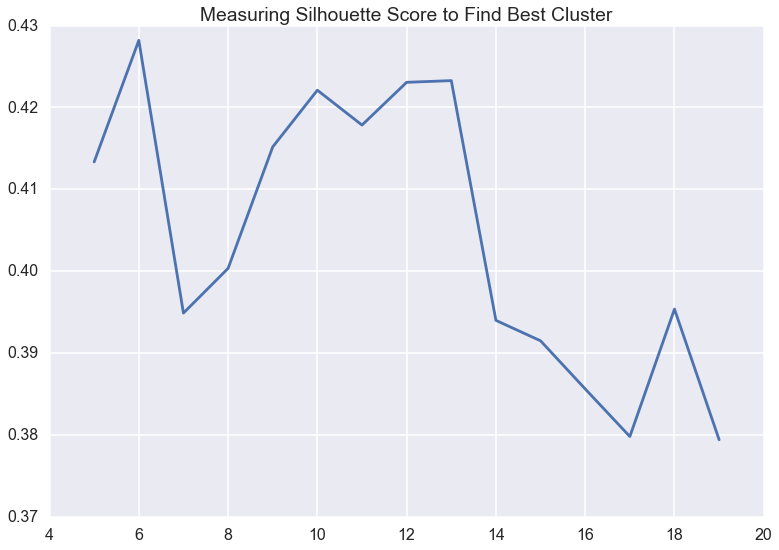

In [13]:
find_best_cluster(X_tsne,5,20)

### KMeans Clustering

In [14]:
kmeans = kmeans(X_tsne, 10)

In [15]:
# Assign labels
data['Cluster'] = kmeans['labels']

# Print silhouette score
print "silhouette score:", kmeans['silhouette_score']

silhouette score: 0.422101454045


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


#### Visualize the Scatter Plot

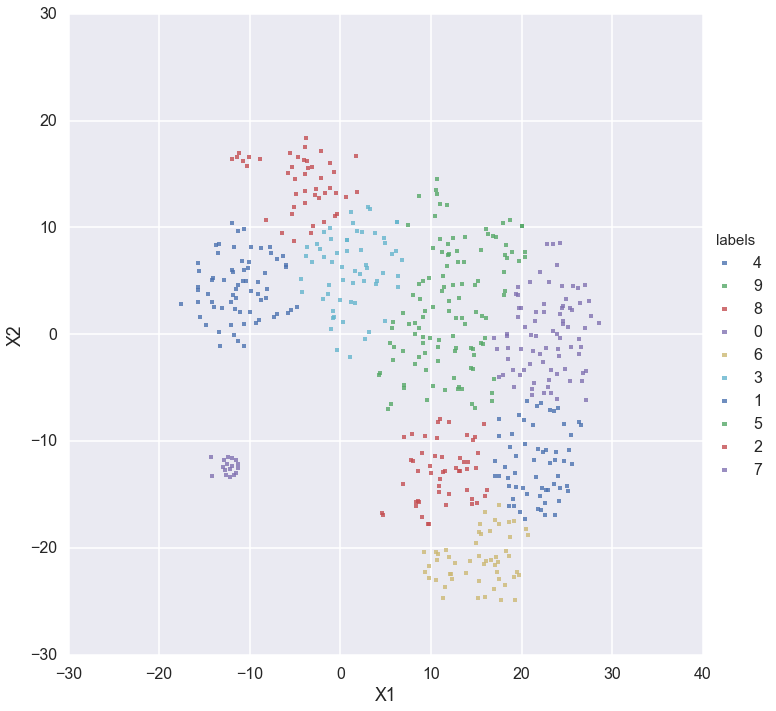

In [16]:
# Target labels
y = kmeans['labels']
df = pd.DataFrame({'X1':X_tsne[:,0],'X2':X_tsne[:,1], 'labels':y})

# Graph with Seaborn
sns.set_context("poster", font_scale=1)
graph = sns.lmplot('X1', 'X2', data=df, fit_reg=False, hue="labels", size=10, palette="deep", markers='s')

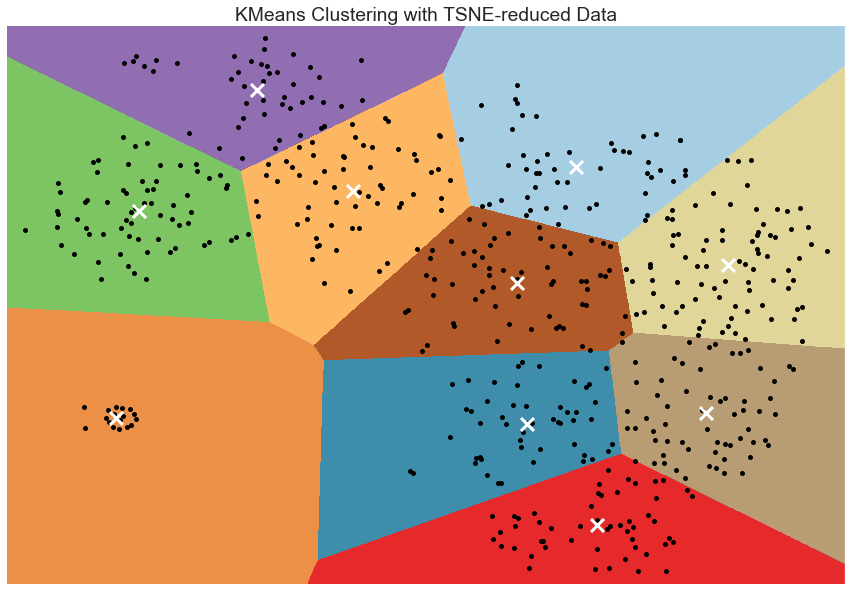

In [17]:
plot_kmeans_cluster(X_tsne, k_clusters=10, plot_title="""KMeans Clustering with TSNE-reduced Data""")

#### Investigate Clusters

In [18]:
data.head()

,Status,Player,Pos,Player_ID,url,G,PER,TS%,FTr,ORB%,...,TRB_100,AST_100,STL_100,BLK_100,TOV_100,PF_100,PTS_100,ORtg,DRtg,Cluster
0,Inactive,A.J. Price,PG,priceaj01,file:///Users/alexcheng/Downloads/us.sitesucke...,261,12.2,0.486,0.193,1.9,...,4.9,7.4,1.6,0.1,3.0,3.1,19.8,100,108,4
1,Active,Aaron Brooks,PG,brookaa01,file:///Users/alexcheng/Downloads/us.sitesucke...,594,13.5,0.525,0.201,2.1,...,4.1,7.4,1.4,0.3,3.8,4.6,24.0,104,110,4
2,Active,Aaron Gordon,SF,gordoaa01,file:///Users/alexcheng/Downloads/us.sitesucke...,182,14.3,0.522,0.290,7.1,...,11.2,3.2,1.4,1.2,2.0,4.2,18.9,107,108,9
4,Active,Adreian Payne,PF,paynead01,file:///Users/alexcheng/Downloads/us.sitesucke...,96,7.4,0.444,0.215,6.4,...,11.3,2.4,1.5,0.9,3.3,7.2,15.1,87,110,9
5,Active,Al Horford,C,horfoal01,file:///Users/alexcheng/Downloads/us.sitesucke...,623,19.0,0.568,0.216,8.0,...,13.6,4.5,1.3,1.9,2.5,3.7,22.3,114,104,8


In [19]:
data['Cluster'].unique()

array([4, 9, 8, 0, 6, 3, 1, 5, 2, 7])

In [24]:
mask = (data['Cluster'] == 1)
data[mask][['Player']].head(20)

,Player
23,Andre Drummond
29,Andrew Bogut
50,Bernard James
51,Bismack Biyombo
53,Boban Marjanovic
59,Brandan Wright
67,Brendan Haywood
95,Chris Andersen
104,Chuck Hayes
107,Clint Capela


### Feature Importance for each Cluster

In [25]:
cluster_data = data[mask].drop(['Player', 'Pos', 'Cluster', 'url', 'Player_ID', 'Status'], axis=1)
league_data = data.drop(['Player', 'Pos', 'Cluster', 'url', 'Player_ID', 'Status'], axis=1)

feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)

,Feature,Importance,Cluster Average,League Average
0,PER,0.251130,15.511940,13.921755
1,FG%,0.212606,0.530627,0.454477
2,FG%_100,0.212527,0.530582,0.454481
3,2P%,0.207154,0.533179,0.485967
4,2P%_100,0.207100,0.533149,0.485951
5,FTA_100,0.201265,5.522388,4.613163
6,TRB%,0.198031,16.535821,10.219744
7,TS%,0.196767,0.556836,0.533362
8,PTS_100,0.195377,17.158209,19.872212
9,TRB_100,0.193657,14.991045,9.228519


### Cluster Descriptions
- Cluster 0: 
- Cluster 1:
- Cluster 2: 
- Cluster 3:
- Cluster 4:
- Cluster 5:
- Cluster 6:
- Cluster 7: 